In [1]:
# some libraries for the processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()

In [2]:
# the path of the result file
path_1 = '../rdf/2018-0607-RDF-fixedindexing-exh.log'
path_2 = '../rdf/2018-2707-RDF-newindexing.log'

In [3]:
# extract the details of the system properties on which the experiment was conducted
def extract_header(filename):
    d = {}
    num_header = 0
    with open(filename, 'r') as f:
        props = {}
        name = ''
        for _l in f:
            line = _l.strip()
            if line.startswith('#'):
                num_header += 1
                if len(line)>1:
                    line = line.replace('#', '').strip().replace(': ', '=')
                    if len(line.split('=')) == 1: # another property
                        name = line
                        props = {}
                        d[name] = props
                    else:
                        r = line.split('=')
                        props[r[0].replace('--', '')] = r[1]

    # the dataframes that correspond to each type of properties
    result = {
        'compile': pd.DataFrame.from_dict(d['Compile-time properties'], orient='index'),
        'system': pd.DataFrame.from_dict(d['System'], orient='index'),
        'project': pd.DataFrame.from_dict(d['Config'], orient='index'),
        'params': pd.DataFrame.from_dict(d['Command line params'], orient='index'),
        'num_header': num_header
    }
    
    return result

In [4]:
header_1 = extract_header(path_1)
header_2 = extract_header(path_2)

### Compile-time properties (module, branch, version of the code)

In [5]:
header_1['compile'].merge(header_2['compile'], 
                        right_index=True, 
                        left_index=True, 
                        suffixes=("_Old indexing", "_New indexing"))

0_Old indexing  0_New indexing
Module     kwd-search-het  kwd-search-het
Version    0.0.2-SNAPSHOT  0.0.2-SNAPSHOT
Branch        experiments     experiments
ChangeSet         f02733d         d957760
Build       20180706-1714   20180729-1224

### The system configuration (on which version of which OS, the number of CPUs)

In [6]:
header_1['system'].merge(header_2['system'], 
                        right_index=True, 
                        left_index=True, 
                        suffixes=("_Old indexing", "_New indexing"))

0_Old indexing             0_New indexing
StartTime                     2018-07-06                 2018-07-29
OS                                 Linux                      Linux
OSArch                             amd64                      amd64
OSVersion      3.10.0-693.2.2.el7.x86_64  3.10.0-693.2.2.el7.x86_64
StartUpMem                        1630MB                     4153MB
StartUpMaxMem                    28631MB                    28631MB
NumCPUs                               40                         40

### The configuration of the project (relational settings, treetagger)

In [7]:
header_1['project'].merge(header_2['project'], 
                        right_index=True, 
                        left_index=True, 
                        suffixes=("_Old indexing", "_New indexing"))

0_Old indexing  \
PYTHONPath                                                /python   
RDBMSHost                                               localhost   
RDBMSUser                                                kwsearch   
RDBMSTableName                                                      
RDBMSPort                                                    5432   
cache_location                                              cache   
RDBMSDBName                                              kwsearch   
RDBMSPassword                                                       
default_locale                                                 fr   
RDFDBName                                              testkwdrdf   
solrConfigSets  /path/to/SOFT/solr-6.6.1/solr/server/solr/conf...   

                                                   0_New indexing  
PYTHONPath                                                /python  
RDBMSHost                                               localhost  
RDBMSUser                                                kwsearch  
RDBMSTableName                                                     
RDBMSPort                                                    5432  
cache_location                                              cache  
RDBMSDBName                                            cl_default  
RDBMSPassword                                                      
default_locale                                                 fr  
RDFDBName                                              testkwdrdf  
solrConfigSets  /path/to/SOFT/solr-6.6.1/solr/server/solr/conf...

### The command line parameters

In [8]:
header_1['params'].merge(header_2['params'], 
                        right_index=True, 
                        left_index=True, 
                        suffixes=("_Old indexing", "_New indexing"))

0_Old indexing  \
help                                                                false   
extractor               fr.inria.cedar.kwdSearchHet.extraction.LazyOpe...   
p2b-param                                                              []   
databases                                                              []   
reset-between-datasets                                              false   
output                                       java.io.PrintStream@31b80ceb   
config                                                                      
verbose                                                             false   
p2b-method                                                            DFS   
p2b-heuristic                                                        NONE   
thread-for-p2b                                                      false   
scoring                                                                     
query                                                                       
lang                                                                   fr   
interactive-mode                                                    false   
input                   [fr/RDF/model-03_17-disjoint/model-03_17-50.nt...   

                                                           0_New indexing  
help                                                                false  
extractor               fr.inria.cedar.kwdSearchHet.extraction.EntityE...  
p2b-param                                                              []  
databases                                                              []  
reset-between-datasets                                              false  
output                                       java.io.PrintStream@154864f8  
config                                                                     
verbose                                                             false  
p2b-method                                                            DFS  
p2b-heuristic                                                        NONE  
thread-for-p2b                                                      false  
scoring                                                                    
query                                                                      
lang                                                                   fr  
interactive-mode                                                    false  
input                   [fr/RDF/model-03_17-disjoint/model-03_17-50.nt...

## Visualization of the experiment result

In [9]:
data_1 = pd.read_csv(path_1, skiprows=header_1['num_header'], sep='\t', skipfooter=1, engine='python')
columns_1 = ['INPUT', 'INPUT_SIZE', 'SUMMARIZATION', 'TRIPLE_PARSING', 
             'INDEXING', 'EXTRACTION', 'SAMEAS',
             'BUILDMAP', 'PATH2BORDERS',
             'TotalTime (s)', 'TotalTime (min)',
             'NUM_NODES', 'NUM_EDGES', 'NUM_BORDERS', 'NUM_P2B']
data_1['TotalTime (s)'] = data_1['TotalTime']/1000
data_1['TotalTime (min)'] = data_1['TotalTime']/(1000*60)
data_1[columns_1].round(3)

INPUT  INPUT_SIZE  \
0  /data/connectionlens/fr/RDF/model-03_17-disjoi...          50   
1  /data/connectionlens/fr/RDF/model-03_17-disjoi...         100   
2  /data/connectionlens/fr/RDF/model-03_17-disjoi...         200   
3  /data/connectionlens/fr/RDF/model-03_17-disjoi...         400   
4  /data/connectionlens/fr/RDF/model-03_17-disjoi...         800   
5  /data/connectionlens/fr/RDF/model-03_17-disjoi...        1600   
6  /data/connectionlens/fr/RDF/model-03_17-disjoi...        3200   
7  /data/connectionlens/fr/RDF/model-03_17-disjoi...        6400   

   SUMMARIZATION  TRIPLE_PARSING  INDEXING  EXTRACTION  SAMEAS  BUILDMAP  \
0            729               7       724           0      40        75   
1            602               6       709           0      82        89   
2            650               6      1509           0     188       203   
3            652               5      3110           0     627       413   
4            678               7      4915           0    1877       765   
5            730               7      8922           0    5902      1560   
6            784               9     17297           0   22630      3026   
7            986              20     28877           0   83701      6235   

   PATH2BORDERS  TotalTime (s)  TotalTime (min)  NUM_NODES  NUM_EDGES  \
0           112          1.688            0.028         50         50   
1           423          1.911            0.032        131        150   
2          1402          3.958            0.066        296        350   
3          3798          8.605            0.143        605        751   
4         14541         22.783            0.380       1185       1552   
5         57528         74.649            1.244       2262       3165   
6        216068        259.814            4.330       4332       6397   
7        843730        963.549           16.059       8240      12964   

   NUM_BORDERS  NUM_P2B  
0            0      667  
1           20     3275  
2           51    12998  
3           97    38256  
4          182   126568  
5          337   414394  
6          678  1209034  
7         1597  3199224

In [10]:
data_2 = pd.read_csv(path_2, skiprows=header_2['num_header'], sep='\t', skipfooter=1, engine='python')
columns_2 = ['INPUT', 'INPUT_SIZE', 'SUMMARIZATION', 'TRIPLE_PARSING', 
             'INDEXING', 'EXTRACTION', 'SAMEAS',
             'BUILDMAP', 'PATH2BORDERS',
             'TotalTime (s)', 'TotalTime (min)',
             'NUM_NODES', 'NUM_EDGES', 'NUM_BORDERS', 'NUM_P2B']
data_2['TotalTime (s)'] = data_2['TotalTime']/1000
data_2['TotalTime (min)'] = data_2['TotalTime']/(1000*60)
data_2['SAMEAS'] = data_2['FIND_CANDIDATES']+data_2['SAMEAS']
data_2[columns_2].round(3)

INPUT  INPUT_SIZE  \
0  /data/connectionlens/fr/RDF/model-03_17-disjoi...          50   
1  /data/connectionlens/fr/RDF/model-03_17-disjoi...         100   
2  /data/connectionlens/fr/RDF/model-03_17-disjoi...         200   
3  /data/connectionlens/fr/RDF/model-03_17-disjoi...         400   
4  /data/connectionlens/fr/RDF/model-03_17-disjoi...         800   
5  /data/connectionlens/fr/RDF/model-03_17-disjoi...        1600   
6  /data/connectionlens/fr/RDF/model-03_17-disjoi...        3200   
7  /data/connectionlens/fr/RDF/model-03_17-disjoi...        6400   

   SUMMARIZATION  TRIPLE_PARSING  INDEXING  EXTRACTION  SAMEAS  BUILDMAP  \
0            718               6         5         935      97        73   
1            661               5         7         678     156        93   
2            644               5        15        1242     380       186   
3            628               5        32        2423     461       380   
4            641               6        45        4364     873       758   
5            727               8        84        7228    2982      1618   
6            825              13       159       16862    4373      3047   
7            973              21       305       37484   11391      6245   

   PATH2BORDERS  TotalTime (s)  TotalTime (min)  NUM_NODES  NUM_EDGES  \
0           170          2.004            0.033         61         60   
1           676          2.276            0.038        169        186   
2          2577          5.049            0.084        388        439   
3          5251          9.180            0.153        811        951   
4         15352         22.039            0.367       1579       1938   
5         65794         78.441            1.307       3010       3896   
6        306458        331.737            5.529       5747       7780   
7       1427515       1483.935           24.732      10921      15486   

   NUM_BORDERS  NUM_P2B  
0            0      724  
1           18     4026  
2           46    18632  
3           90    48873  
4          180   124039  
5          330   341399  
6          634  1082855  
7         1262  3203785

In [11]:
time_measures = ['SUMMARIZATION', 'TRIPLE_PARSING', 'INDEXING', 'SAMEAS', 
                 'EXTRACTION', 'BUILDMAP', 'PATH2BORDERS', 
                 'TotalTime']
item_measures = ['NUM_NODES', 'NUM_EDGES', 'NUM_BORDERS', 'NUM_P2B']
size = ['INPUT_SIZE']

In [12]:
X = data_2[size] # get the number of triples

### (A) Line plot: execution time of each phase

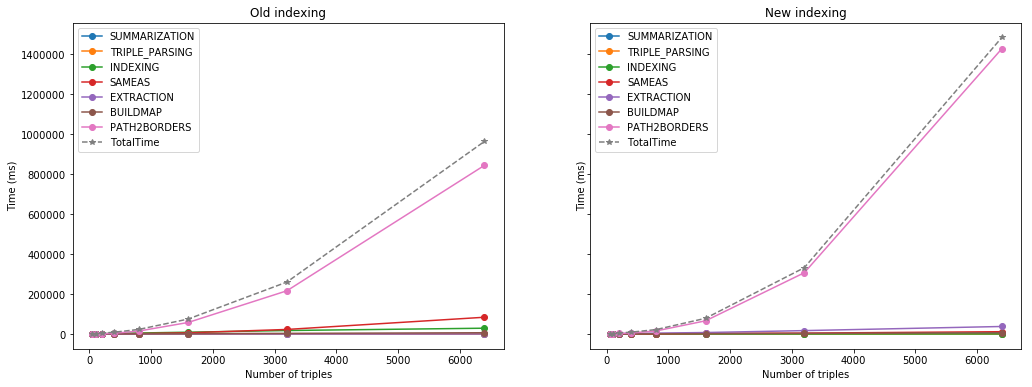

In [13]:
def plot_line_time(X, data, title, ax):
    ax.plot(X, data[time_measures[0:7]], marker='o')
    ax.plot(X, data[time_measures[-1]], marker='*', linestyle='--')
    ax.set_title(title)
    ax.legend(time_measures)
    ax.set_ylabel('Time (ms)')
    ax.set_xlabel('Number of triples')
    
fig, axes = plt.subplots(1, 2, figsize=(17,6), sharey=True)
plot_line_time(X, data_1, 'Old indexing', axes[0])
plot_line_time(X, data_2, 'New indexing', axes[1])
plt.show()

### (B) Pie chart: the portion of execution time occupied by each phase (sorted in descending order)

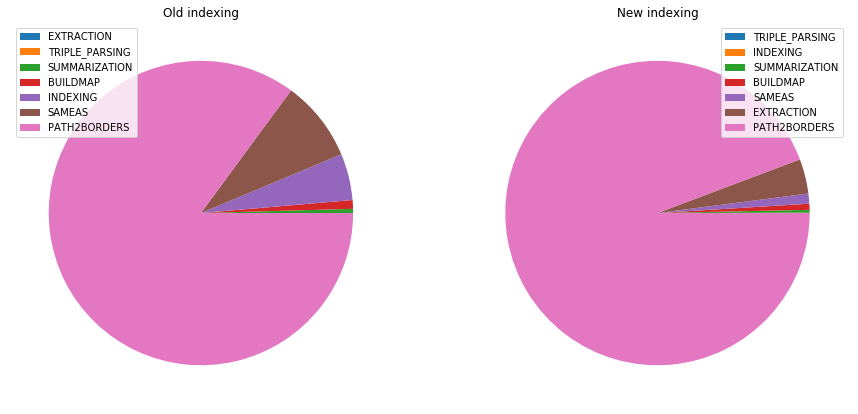

In [14]:
def plot_pie(data, title, ax):
    means = np.mean(data[time_measures[0:7]].values, axis=0)
    order = np.argsort(means)
    ax.pie(means[order])
    ax.legend(labels[order])
    ax.set_title(title)
    
labels = np.array(time_measures[0:7])
fig, axes = plt.subplots(1, 2, figsize = (15,7))
plot_pie(data_1, 'Old indexing', axes[0])
plot_pie(data_2, 'New indexing', axes[1])
plt.show()

The pie chart is to show the portion of time occupied by each phase, once again we observe that **PATH2BORDERS** and **SAMEAS** occupy most of the time. We do not see **TRIPLE_PARSING** shown on the chart because the measure is too small in comparison to the other measures.

### (C) Line chart: number of items created after the registration of each source (nodes, edges, borders)

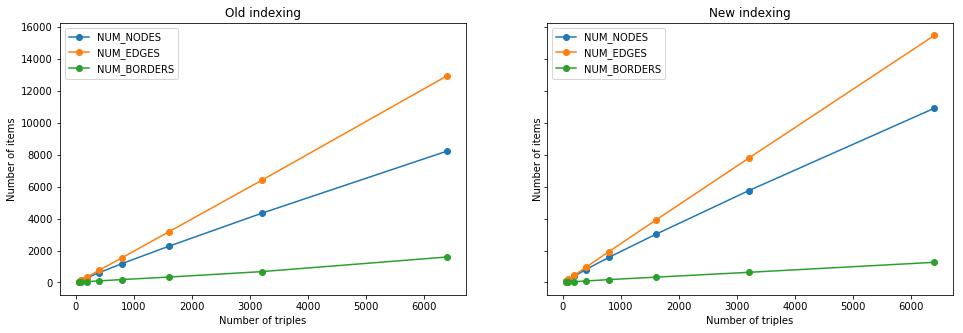

In [15]:
def plot_items_nop2b(X, data, title, ax):
    ax.plot(X, data[item_measures[:-1]], marker='o')
    ax.legend(item_measures[:-1])
    ax.set_xlabel('Number of triples')
    ax.set_ylabel('Number of items')
    ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(16,5), sharey=True)
plot_items_nop2b(X, data_1, 'Old indexing', axes[0])
plot_items_nop2b(X, data_2, 'New indexing', axes[1])
plt.show()

This plot shows the growth rate of the number of nodes, edges, and borders as we double the input size.

### (D) Line chart: number of items created after the publication of each source, including the number of P2B's

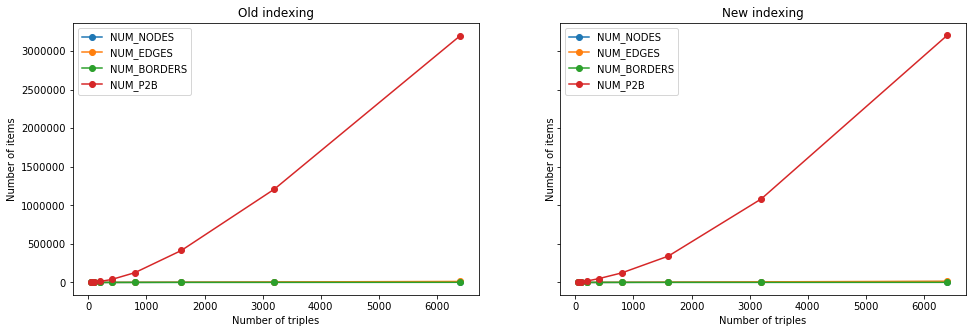

In [16]:
def plot_items(X, data, title, ax):
    ax.plot(X, data[item_measures], marker='o')
    ax.legend(item_measures)
    ax.set_xlabel('Number of triples')
    ax.set_ylabel('Number of items')
    ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(16,5), sharey=True)
plot_items(X, data_1, 'Old indexing', axes[0])
plot_items(X, data_2, 'New indexing', axes[1])
plt.show()

This plot also shows the growth rate of the number of nodes, edges, borders, and P2B's as we double the input size (in (C) the line of P2B's is not included). The number of P2B's rises exponentially, with 6000 triples we create more than 3,000,000 P2B's (`select count(*) from p2b`).

### (E) Line chart: Number of P2B's v.s. The execution time of P2B computation

In [17]:
def p2b_time_amount(X, data, title, ax):
    color1 = 'black'
    ax.set_xlabel('Number of triples')
    ax.set_ylabel('Time (ms)', color=color1)
    f1 = ax.plot(X, data['PATH2BORDERS'].values, marker='o', color=color1)
    ax.tick_params(axis='y', labelcolor=color1)
    
    ax2 = ax.twinx()
    color2 = 'purple'
    ax2.set_ylabel('Number of items', color=color2)
    f2 = ax2.plot(X, data['NUM_P2B'].values, marker='^', color=color2, linestyle='--')
    f3 = ax2.plot(X, data['NUM_EDGES'].values, marker='s', color=color2, linestyle='--')
    ax2.tick_params(axis='y', labelcolor=color2)
    ax2.set_ylim(0, 3500000)
    
    figs = f1+f2+f3
    ax.legend(figs, ['PATH2BORDERS', 'NUM_P2B', 'NUM_EDGES'], loc=2)
    ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(17,5), sharey=True)
p2b_time_amount(X, data_1, 'Old indexing', axes[0])
p2b_time_amount(X, data_2, 'New indexing', axes[1])
plt.show()